In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Loading the data
zomato = pd.read_csv(r'/content/drive/MyDrive/Files.csv/zomato_data.csv')
geo = pd.read_csv(r'/content/drive/MyDrive/Files.csv/Geographical Coordinates.csv')
print(zomato.shape)
print(geo.shape)

(51717, 10)
(26, 3)


In [16]:
# Creating a function for cleaning th erating column.
def clean_rating_column(df, column='rate'):
    df[column] = df[column].replace(['-', 'NEW', 'nan', 'NaN'], np.nan)
    df[column] = df[column].astype(str).str.replace('/5', '', regex=False)
    df[column] = pd.to_numeric(df[column], errors='coerce')
    median_rating = df[column].median()
    df[column] = df[column].fillna(median_rating)

    return df

In [17]:
zomato = clean_rating_column(zomato, 'rate')

In [18]:
# creating a function for cleaning the cost column
def clean_cost_column(df, column='approx_costfor_two_people'):
    df[column] = df[column].astype(str).str.replace(',', '', regex=False)
    df[column] = pd.to_numeric(df[column], errors='coerce')

    median_cost = df[column].median()
    df[column] = df[column].fillna(median_cost)

    return df

In [19]:
zomato = clean_cost_column(zomato, 'approx_costfor_two_people')

In [20]:
# Imputing the missing Values
zomato['dish_liked'] = zomato['dish_liked'].replace(['NaN', np.nan], 'Not Available')
zomato['cuisines'] = zomato['cuisines'].replace(['NaN', np.nan], 'Other')
zomato['rest_type'] = zomato['rest_type'].replace(['NaN', np.nan], 'Unknown')

In [21]:
# Imputing the missing values with Median votes
median_vote = zomato['votes'].median()
zomato['votes'] = zomato['votes'].replace(0, median_vote)

In [22]:
# Converting catogiries into binary
zomato['online_order'] = zomato['online_order'].map({'Yes': 1, 'No': 0})
zomato['book_table'] = zomato['book_table'].map({'Yes': 1, 'No': 0})

In [23]:
# Type Converstion
zomato['rate'] = zomato['rate'].astype(float)
zomato['votes'] = zomato['votes'].astype(int)
zomato['approx_costfor_two_people'] = zomato['approx_costfor_two_people'].astype(int)

In [24]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int64  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 3.9+ MB


## visualizations

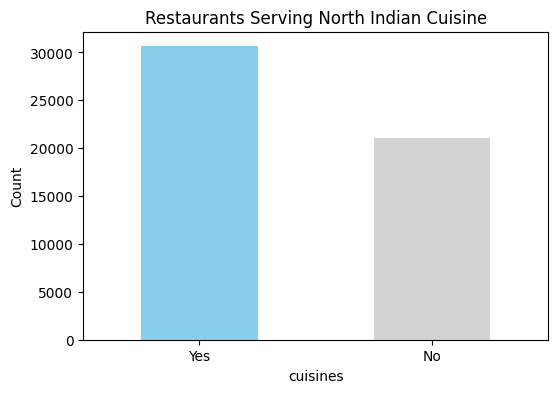

In [25]:
# How many restaurants serve North Indian cuisine?

plt.figure(figsize=(6, 4))
zomato['cuisines'].str.contains("North Indian", na=False).value_counts().plot(kind='bar', color=['skyblue', 'lightgray'])
plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
plt.title("Restaurants Serving North Indian Cuisine")
plt.ylabel("Count")
plt.show()



<ipython-input-28-ab0cf1702a97>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette='rocket')


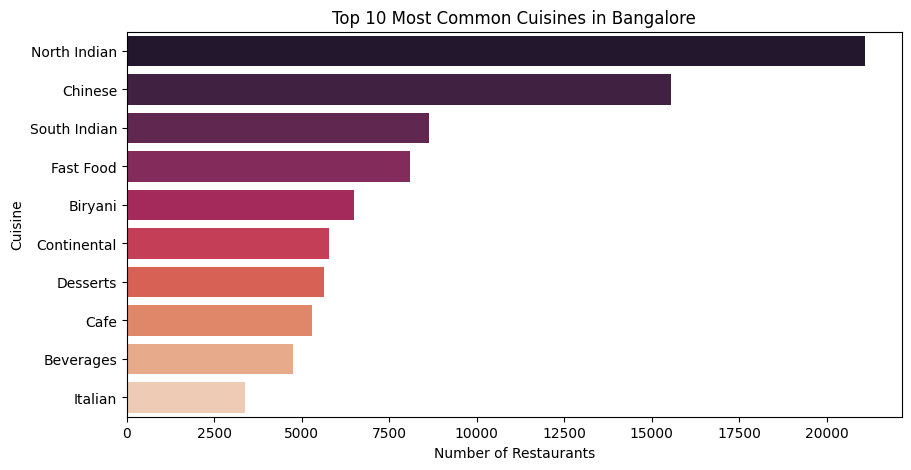

In [28]:
# Most commonly offered cuisine in Bangalore
from collections import Counter
from itertools import chain

cuisine_list = zomato['cuisines'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
flat = list(chain.from_iterable(cuisine_list))
common = Counter(flat).most_common(10)

labels, values = zip(*common)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(values), y=list(labels), palette='rocket')
plt.title("Top 10 Most Common Cuisines in Bangalore")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


<ipython-input-33-08c8f929d956>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_localities.values, y=top_localities.index, palette='Spectral')


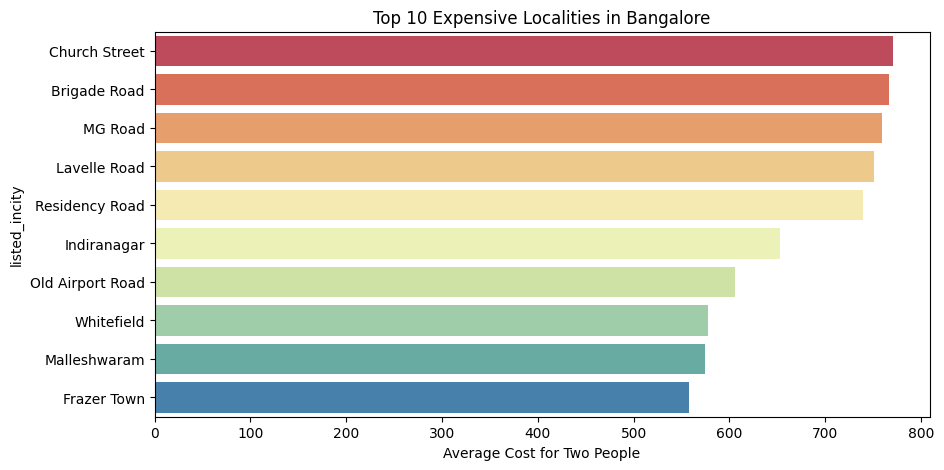

In [33]:
# Locality with highest avg cost for two
top_localities = zomato.groupby('listed_incity')['approx_costfor_two_people'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_localities.values, y=top_localities.index, palette='Spectral')
plt.title("Top 10 Expensive Localities in Bangalore")
plt.xlabel("Average Cost for Two People")
plt.show()


<ipython-input-34-fd92d07d0485>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette='icefire')


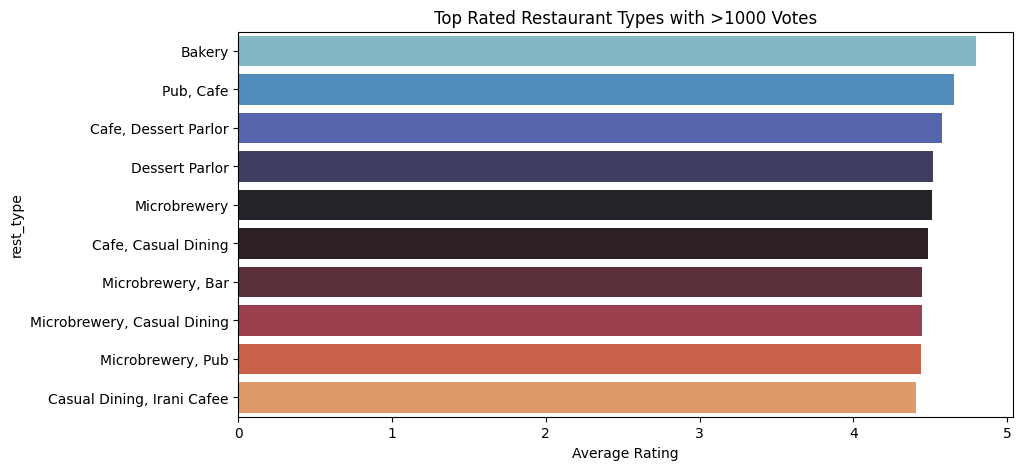

In [34]:
# Restaurant type with top rating & >1000 votes
top_rated = zomato[zomato['votes'] > 1000].groupby('rest_type')['rate'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='icefire')
plt.title("Top Rated Restaurant Types with >1000 Votes")
plt.xlabel("Average Rating")
plt.show()


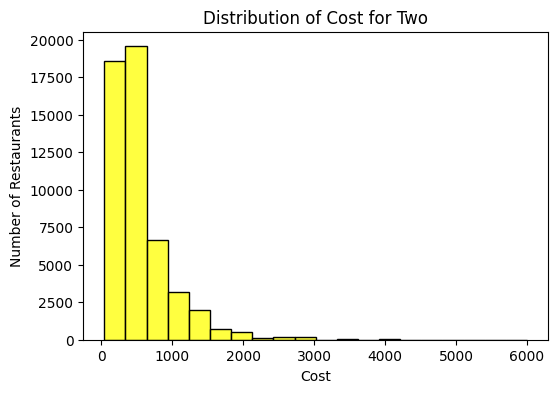

In [44]:
#  5. Minimum cost to eat out
plt.figure(figsize=(6, 4))
sns.histplot(zomato['approx_costfor_two_people'], bins=20, color='yellow')
plt.title("Distribution of Cost for Two")
plt.xlabel("Cost")
plt.ylabel("Number of Restaurants")
plt.show()

<ipython-input-45-cf7433bc3b83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=invest_locs.values, y=invest_locs.index, palette='Set2')


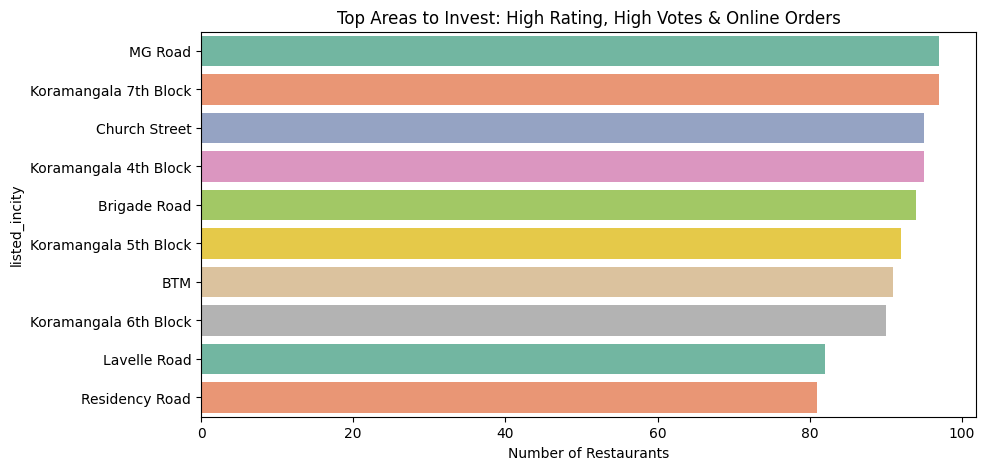

In [45]:
# Investment-worthy areas: rating > 4.2, votes > 500, online order
hotspot = zomato[(zomato['rate'] > 4.2) & (zomato['votes'] > 500) & (zomato['online_order'] == 1)]
invest_locs = hotspot['listed_incity'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=invest_locs.values, y=invest_locs.index, palette='Set2')
plt.title("Top Areas to Invest: High Rating, High Votes & Online Orders")
plt.xlabel("Number of Restaurants")
plt.show()

In [49]:
import plotly.express as px

def visualize_investment_areas(df):
    hotspot = df[(df['rate'] > 4.2) & (df['votes'] > 500) & (df['online_order'] == 1)]
    invest_locs = hotspot['listed_incity'].value_counts().head(10)
    fig = px.bar(x=invest_locs.values, y=invest_locs.index, orientation='h',
                 labels={'x': 'Number of Restaurants', 'y': 'listed_incity'},
                 title="Top Areas to Invest: High Rating, High Votes & Online Orders")
    fig.show()

In [50]:
visualize_investment_areas(zomato)